# Import all components

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df= pd.read_csv('../DATA/Telco-Customer-Churn.csv')

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Data Check

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


## EDA

### Check null values 

In [10]:
df.isnull()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7028,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7029,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7030,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [9]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Counts of Yes and No (Class labels in Churn)

<AxesSubplot:xlabel='Churn', ylabel='count'>

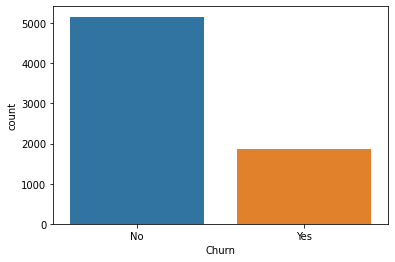

In [14]:
sns.countplot(x='Churn',data=df)

<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

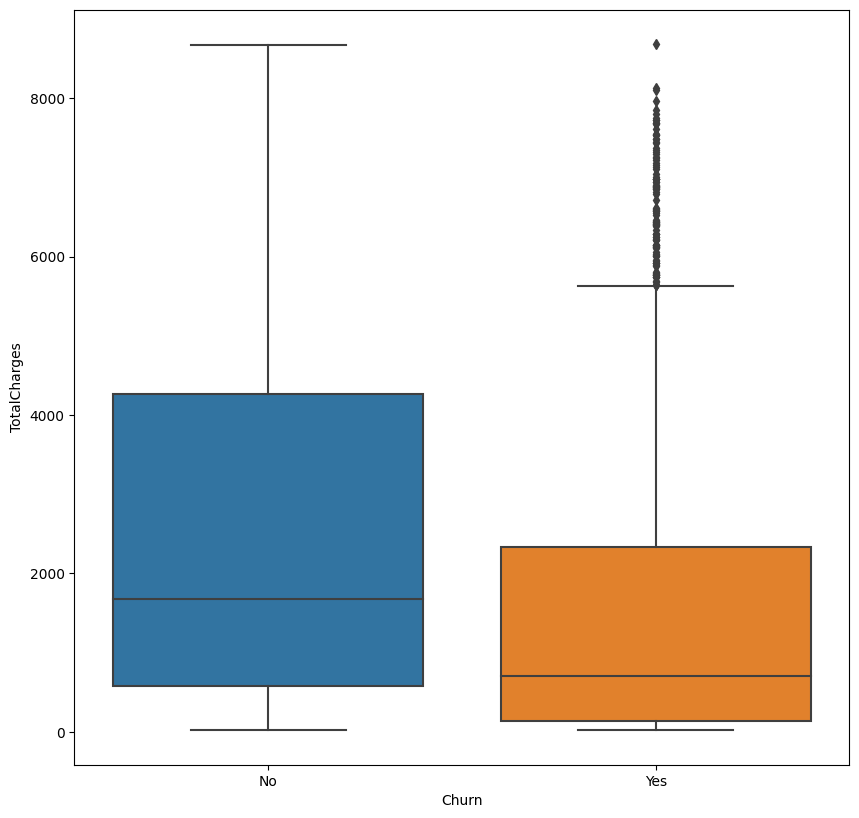

In [25]:
plt.figure(figsize=(10,10),dpi=100)
sns.boxplot(x='Churn',y='TotalCharges',data=df)

<AxesSubplot:xlabel='Contract', ylabel='TotalCharges'>

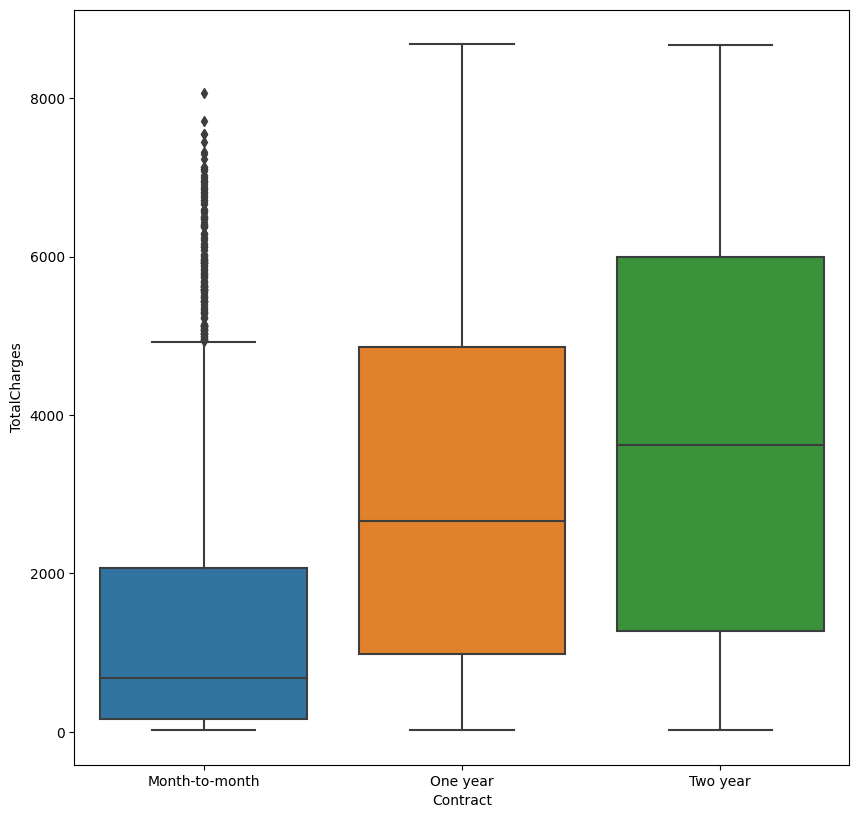

In [30]:
plt.figure(figsize=(10,10),dpi=100)
sns.boxplot(x='Contract',y='TotalCharges',data=df)

### Correlation of features with the class label

In [ ]:
## Convert the categorical variables dummy variables

In [31]:
corr_df=pd.get_dummies(df[['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 
 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService',
   'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod','Churn']]).corr()

In [32]:
corr_df

,SeniorCitizen,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
SeniorCitizen,1.000000,0.001819,-0.001819,-0.016957,0.016957,0.210550,-0.210550,-0.008392,0.008392,-0.136377,...,-0.046491,-0.116205,-0.156258,0.156258,-0.016235,-0.024359,0.171322,-0.152987,-0.150541,0.150541
gender_Female,0.001819,1.000000,-1.000000,-0.001379,0.001379,0.010349,-0.010349,-0.007515,0.007515,-0.004335,...,-0.007755,0.003603,-0.011902,0.011902,0.015973,-0.001632,-0.000844,-0.013199,-0.008545,0.008545
gender_Male,-0.001819,-1.000000,1.000000,0.001379,-0.001379,-0.010349,0.010349,0.007515,-0.007515,0.004335,...,0.007755,-0.003603,0.011902,-0.011902,-0.015973,0.001632,0.000844,0.013199,0.008545,-0.008545
Partner_No,-0.016957,-0.001379,0.001379,1.000000,-1.000000,0.452269,-0.452269,0.018397,-0.018397,0.130028,...,-0.083067,-0.247334,-0.013957,0.013957,-0.111406,-0.082327,0.083207,0.096948,-0.149982,0.149982
Partner_Yes,0.016957,0.001379,-0.001379,-1.000000,1.000000,-0.452269,0.452269,-0.018397,0.018397,-0.130028,...,0.083067,0.247334,0.013957,-0.013957,0.111406,0.082327,-0.083207,-0.096948,0.149982,-0.149982
Dependents_No,0.210550,0.010349,-0.010349,0.452269,-0.452269,1.000000,-1.000000,-0.001078,0.001078,-0.023388,...,-0.069222,-0.201699,-0.110131,0.110131,-0.052369,-0.061134,0.149274,-0.056448,-0.163128,0.163128
Dependents_Yes,-0.210550,-0.010349,0.010349,-0.452269,0.452269,-1.000000,1.000000,0.001078,-0.001078,0.023388,...,0.069222,0.201699,0.110131,-0.110131,0.052369,0.061134,-0.149274,0.056448,0.163128,-0.163128
PhoneService_No,-0.008392,-0.007515,0.007515,0.018397,-0.018397,-0.001078,0.001078,1.000000,-1.000000,-0.315218,...,0.003142,-0.004442,0.016696,-0.016696,-0.008271,0.006916,-0.002747,0.004463,0.011691,-0.011691
PhoneService_Yes,0.008392,0.007515,-0.007515,-0.018397,0.018397,0.001078,-0.001078,-1.000000,1.000000,0.315218,...,-0.003142,0.004442,-0.016696,0.016696,0.008271,-0.006916,0.002747,-0.004463,-0.011691,0.011691
MultipleLines_No,-0.136377,-0.004335,0.004335,0.130028,-0.130028,-0.023388,0.023388,-0.315218,0.315218,1.000000,...,0.001694,-0.102756,0.151974,-0.151974,-0.069663,-0.063712,-0.080990,0.222395,0.032654,-0.032654


In [36]:
corr_df['Churn_Yes'].sort_values().iloc[1:-1]

Contract_Two year                         -0.301552
DeviceProtection_No internet service      -0.227578
StreamingMovies_No internet service       -0.227578
StreamingTV_No internet service           -0.227578
InternetService_No                        -0.227578
TechSupport_No internet service           -0.227578
OnlineBackup_No internet service          -0.227578
OnlineSecurity_No internet service        -0.227578
PaperlessBilling_No                       -0.191454
Contract_One year                         -0.178225
OnlineSecurity_Yes                        -0.171270
TechSupport_Yes                           -0.164716
Dependents_Yes                            -0.163128
Partner_Yes                               -0.149982
PaymentMethod_Credit card (automatic)     -0.134687
InternetService_DSL                       -0.124141
PaymentMethod_Bank transfer (automatic)   -0.118136
PaymentMethod_Mailed check                -0.090773
OnlineBackup_Yes                          -0.082307
DeviceProtec

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 [Text(0, 0, 'Contract_Two year'),
  Text(1, 0, 'DeviceProtection_No internet service'),
  Text(2, 0, 'StreamingMovies_No internet service'),
  Text(3, 0, 'StreamingTV_No internet service'),
  Text(4, 0, 'InternetService_No'),
  Text(5, 0, 'TechSupport_No internet service'),
  Text(6, 0, 'OnlineBackup_No internet service'),
  Text(7, 0, 'OnlineSecurity_No internet service'),
  Text(8, 0, 'PaperlessBilling_No'),
  Text(9, 0, 'Contract_One year'),
  Text(10, 0, 'OnlineSecurity_Yes'),
  Text(11, 0, 'TechSupport_Yes'),
  Text(12, 0, 'Dependents_Yes'),
  Text(13, 0, 'Partner_Yes'),
  Text(14, 0, 'PaymentMethod_Credit card (automatic)'),
  Text(15, 0, 'InternetService_DSL'),
  Text(16, 0, 'PaymentMethod_Bank transfer (automatic)'),
  Text(17, 0, 'PaymentMethod_Mailed check'),
  Text(18, 0, 'OnlineBack

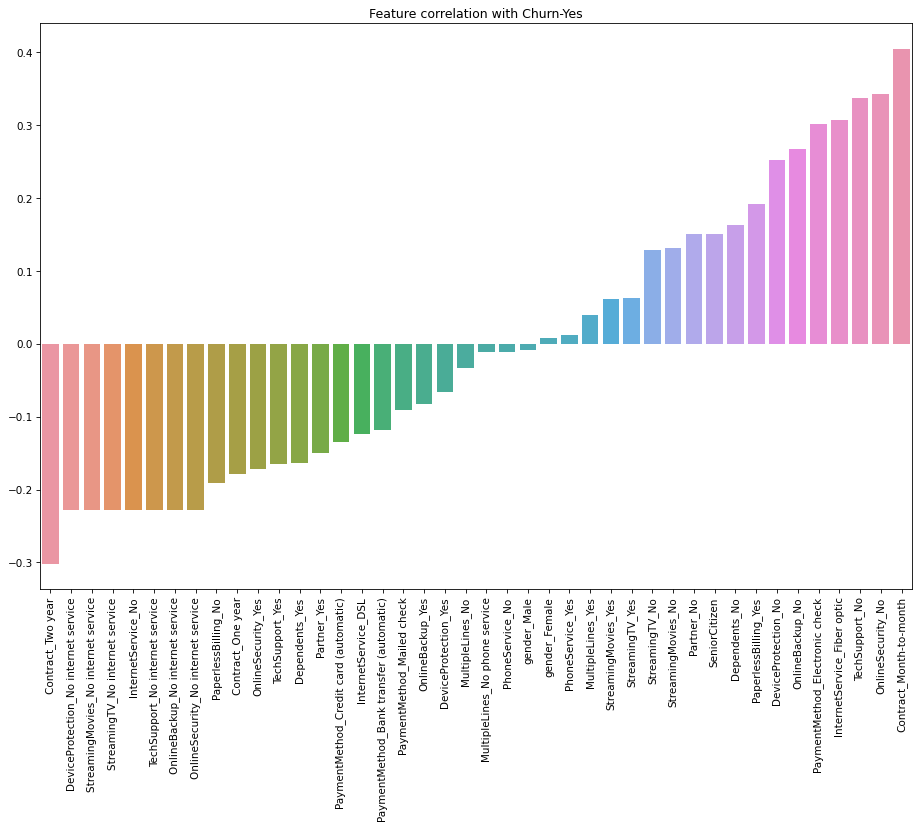

In [44]:
plt.figure(figsize=(15,10),dpi=75)
sns.barplot(x=corr_df['Churn_Yes'].sort_values().iloc[1:-1].index,y=corr_df['Churn_Yes'].sort_values().iloc[1:-1].values)
plt.title('Feature correlation with Churn-Yes')
plt.xticks(rotation=90)


## Churn Analysis

### Different types of contracts and their respective counts

In [47]:
df['Contract'].value_counts()

Month-to-month    3875
Two year          1685
One year          1472
Name: Contract, dtype: int64

<AxesSubplot:xlabel='tenure', ylabel='Count'>

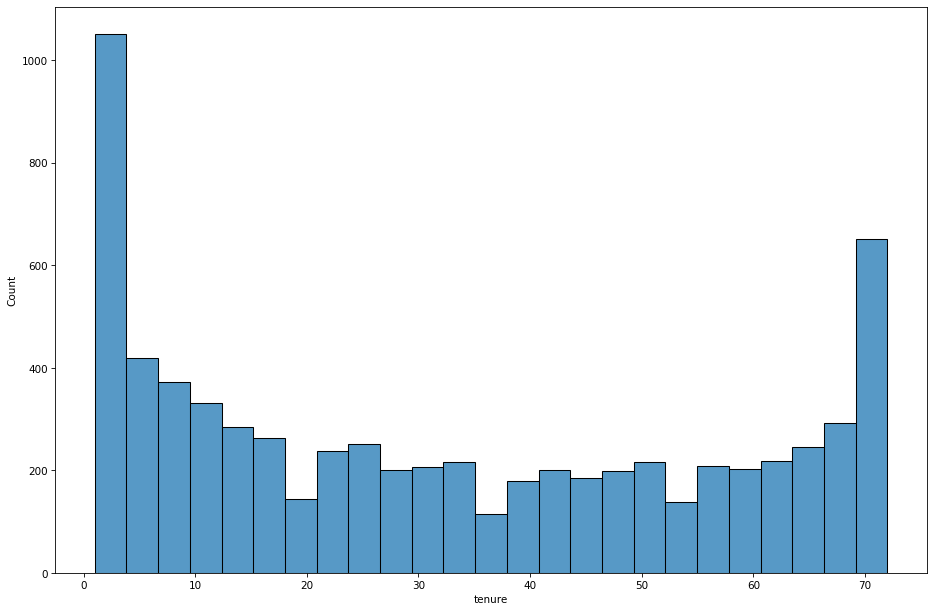

In [51]:
plt.figure(figsize=(15,10),dpi=75)
sns.histplot(x='tenure',bins=25, data=df)

### Distribution of people with respect to two features : Contract & Tenure

<Figure size 500x150 with 0 Axes>

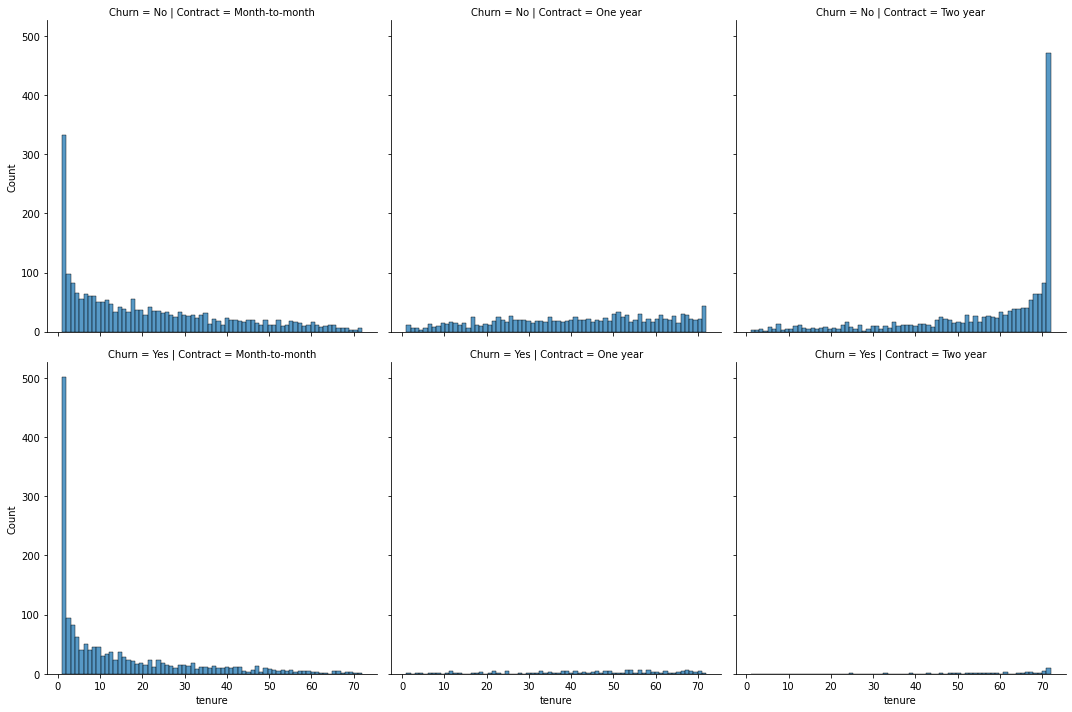

In [58]:
plt.figure(figsize=(10,3),dpi=50)
sns.displot(x='tenure',row='Churn',col='Contract', data=df)

### Total Charges v/s monthly charges

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

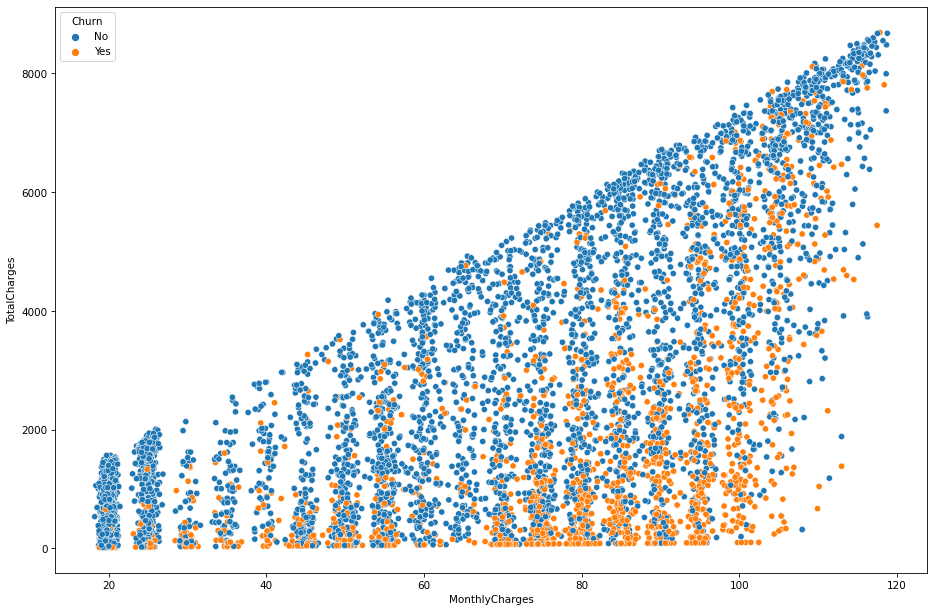

In [71]:
plt.figure(figsize=(15,10),dpi=75)
sns.scatterplot(x='MonthlyCharges',y='TotalCharges',data=df,hue='Churn')

### Segmenting users based on their tenures

In [81]:
no_churn=df.groupby(['Churn','tenure']).count().transpose()['No']
yes_churn=df.groupby(['Churn','tenure']).count().transpose()['Yes']


In [82]:
churn_rate= (yes_churn*100) / (yes_churn + no_churn)

In [84]:
churn_rate.transpose()['customerID']

tenure
1     61.990212
2     51.680672
3     47.000000
4     47.159091
5     48.120301
        ...    
68     9.000000
69     8.421053
70     9.243697
71     3.529412
72     1.657459
Name: customerID, Length: 72, dtype: float64

### Plot of churn rate against tenure

Text(0, 0.5, 'Churn %')

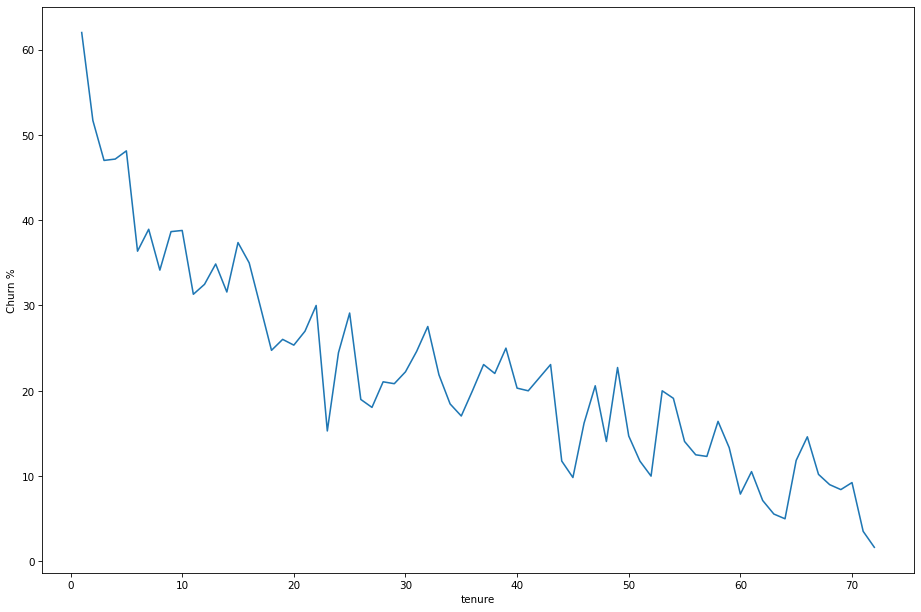

In [99]:
plt.figure(figsize=(15,10),dpi=75)
churn_rate.iloc[0].plot()
plt.ylabel('Churn %')

### Using a new column, create cohort groups on the basis of their tenure
0-12 months
12-24 months
24-48 months
Above 48 months

In [100]:
def cohortsize(tenure) :
    if tenure<13:
        return '0-12 Months'
    elif tenure<25:
        return '12-24 Months'
    elif tenure<49:
        return '24-48 Months'
    else:
        return 'Over 48 Months'
    

In [101]:
df['Tenure Cohort'] = df['tenure'].apply(cohortsize)

In [103]:
df.head(15)[['tenure','Tenure Cohort']]

,tenure,Tenure Cohort
0,1,0-12 Months
1,34,24-48 Months
2,2,0-12 Months
3,45,24-48 Months
4,2,0-12 Months
5,8,0-12 Months
6,22,12-24 Months
7,10,0-12 Months
8,28,24-48 Months
9,62,Over 48 Months


### Plot of monthly charges and total charges with Tenure Cohort

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

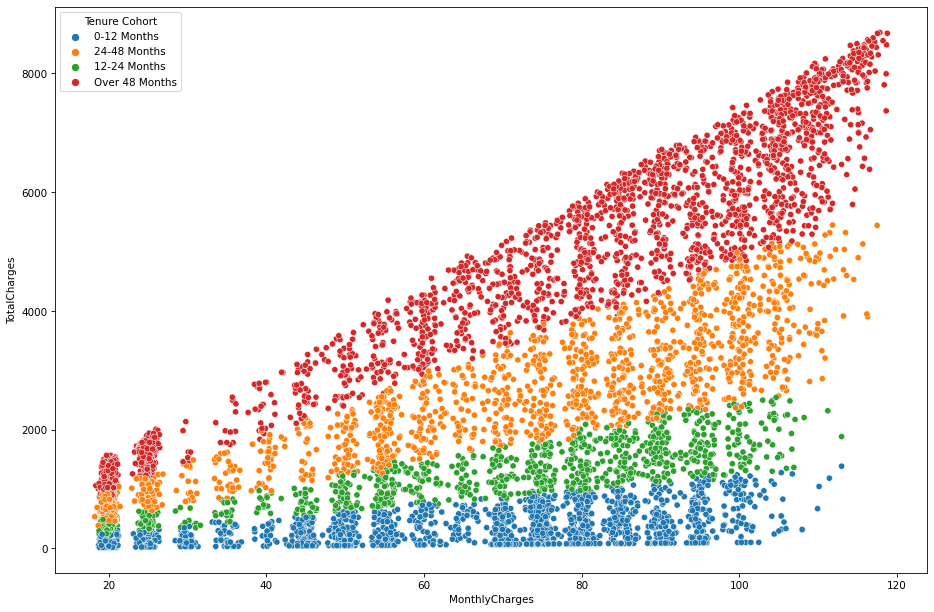

In [108]:
plt.figure(figsize=(15,10),dpi=75)
sns.scatterplot(x='MonthlyCharges',y='TotalCharges',hue='Tenure Cohort',data=df)

In [ ]:
### Churn count per cohort

<AxesSubplot:xlabel='Tenure Cohort', ylabel='count'>

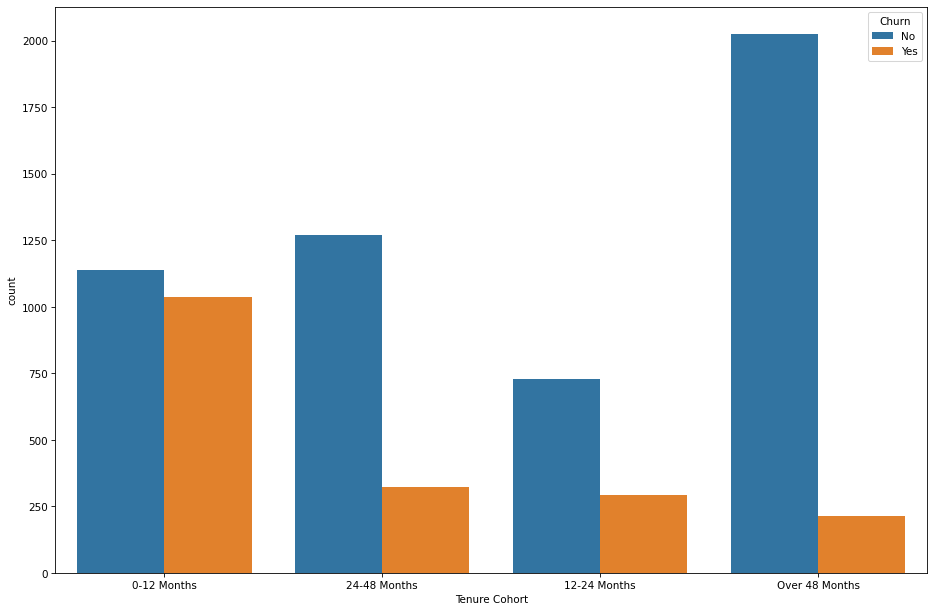

In [115]:
plt.figure(figsize=(15,10),dpi=75)
sns.countplot(x='Tenure Cohort',hue='Churn',data=df)

### Churn count per cohort separated by contract

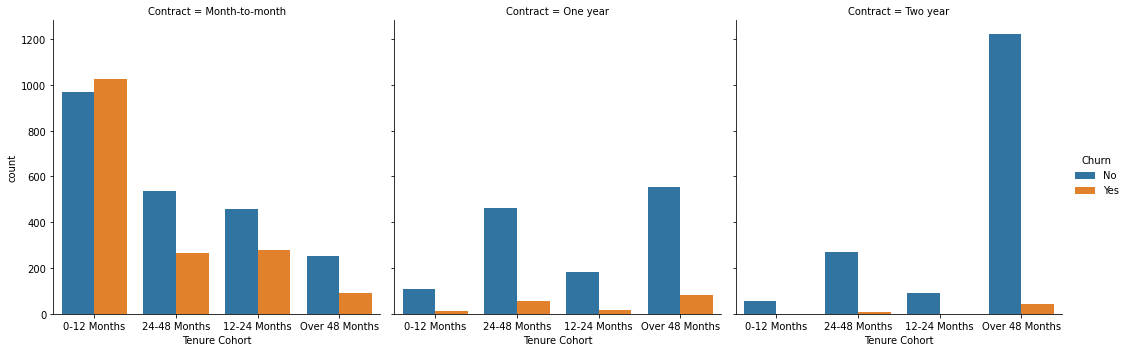

In [118]:
sns.catplot(x='Tenure Cohort',col='Contract',hue='Churn',data=df,kind='count')